In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Ts-OHLC.csv")

In [3]:
dataset

,Open,High,Low,Close
0,1410.60,1427.90,1408.30,1415.10
1,1421.00,1626.60,1416.15,1607.40
2,1632.55,1673.90,1613.05,1626.20
3,1627.75,1627.75,1574.60,1579.05
4,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2220,202.90,207.80,201.35,205.00
2221,206.00,206.85,202.05,202.95
2222,203.90,203.90,199.35,201.00
2223,200.00,222.00,196.00,218.35


In [4]:
column = "Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1 = Ms.fit_transform(dataset[[column]])
print("Len:" , data1.shape)

Len: (2225, 1)


In [6]:
len(data1)

2225

In [7]:
training_size = round(len(data1) * 0.80)
print(training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)

y_train = data1[:training_size]
y_test = data1[training_size:]
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

1780
X_train length: (1780, 1)
X_test length: (445, 1)
y_train length: (1780, 1)
y_test length: (445, 1)


In [8]:
import pandas as pd
Actual_y_train=pd.DataFrame(index=range(len(y_train)),columns=[column])
for i in range(len(y_train)):
    Actual_y_train.iloc[i]=y_train[i]
print(Actual_y_train)

         Close
0     0.854203
1     0.974481
2      0.98624
3     0.956749
4     0.967132
...        ...
1775  0.016919
1776  0.014011
1777  0.013792
1778  0.010883
1779  0.010883

[1780 rows x 1 columns]


In [9]:
#pip install stockFunctions

In [10]:
#pip install --upgrade scikit-learn

In [11]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from stockFunctions import rmsemape  # Importing rmsemape function from stockFunctions module

trends = ['n', 't', 'c', 'ct']
lags = [1, 2, 3, 4]

for i in lags:
    for td in trends:
        model = AutoReg(X_train, lags=i, trend=td)
        model_fit = model.fit()
        y_pred = model_fit.predict(start=len(X_train), end=len(data1) - 1)
        print("Lag = {}, Trend = {}".format(i, td))
        rmsemape(y_test, y_pred)  # Assuming rmsemape returns two value
        print("********************")


Lag = 1, Trend = n
RMSE-Testset: 0.058859347313836866
maPe-Testset: 108221610722.61273
********************
Lag = 1, Trend = t
RMSE-Testset: 0.06567306536707147
maPe-Testset: 105694109653.1172
********************
Lag = 1, Trend = c
RMSE-Testset: 0.043365250337630855
maPe-Testset: 114804919729.45613
********************
Lag = 1, Trend = ct
RMSE-Testset: 0.15273694386318573
maPe-Testset: 74699776526.67192
********************
Lag = 2, Trend = n
RMSE-Testset: 0.05946957243778362
maPe-Testset: 107811149748.47575
********************
Lag = 2, Trend = t
RMSE-Testset: 0.05333387798237568
maPe-Testset: 110268940666.53549
********************
Lag = 2, Trend = c
RMSE-Testset: 0.03487154364938575
maPe-Testset: 119368707397.80006
********************
Lag = 2, Trend = ct
RMSE-Testset: 0.15147077869435058
maPe-Testset: 72770748055.74448
********************
Lag = 3, Trend = n
RMSE-Testset: 0.05944295500377242
maPe-Testset: 108331645493.58388
********************
Lag = 3, Trend = t
RMSE-Testset: 0.0

In [12]:
len(y_pred)

445

In [13]:
i=4
td='c'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=4,Trend=c
RMSE-Testset: 0.03797035787875058
maPe-Testset: 118407724048.3967
************


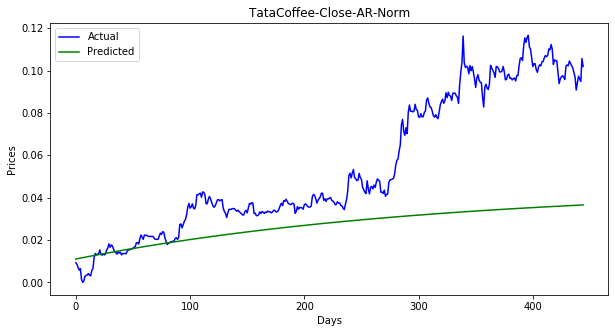

In [14]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [15]:
y_test

array([[0.00931949],
       [0.00856893],
       [0.0070678 ],
       [0.00581686],
       [0.00650488],
       [0.00140731],
       [0.        ],
       [0.00068802],
       [0.0029397 ],
       [0.00325244],
       [0.00350263],
       [0.00422192],
       [0.00337753],
       [0.0030648 ],
       [0.00569177],
       [0.00650488],
       [0.01169627],
       [0.0136665 ],
       [0.01294721],
       [0.01335377],
       [0.01363523],
       [0.01532399],
       [0.01322867],
       [0.01288466],
       [0.01341631],
       [0.01300976],
       [0.01338504],
       [0.01535527],
       [0.01616838],
       [0.01820115],
       [0.0166062 ],
       [0.01770078],
       [0.01723167],
       [0.01573055],
       [0.01444834],
       [0.01416688],
       [0.01335377],
       [0.01447961],
       [0.01382287],
       [0.0142607 ],
       [0.01297848],
       [0.01360395],
       [0.01363523],
       [0.01369777],
       [0.01354141],
       [0.01485489],
       [0.01529272],
       [0.015

In [16]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [17]:
aTestNormTable

,Close
0,0.009319
1,0.008569
2,0.007068
3,0.005817
4,0.006505
...,...
440,0.097323
441,0.096041
442,0.094821
443,0.105673


In [18]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [19]:
actual_stock_price_test_ori

array([[ 64.3 ],
       [ 63.1 ],
       [ 60.7 ],
       [ 58.7 ],
       [ 59.8 ],
       [ 51.65],
       [ 49.4 ],
       [ 50.5 ],
       [ 54.1 ],
       [ 54.6 ],
       [ 55.  ],
       [ 56.15],
       [ 54.8 ],
       [ 54.3 ],
       [ 58.5 ],
       [ 59.8 ],
       [ 68.1 ],
       [ 71.25],
       [ 70.1 ],
       [ 70.75],
       [ 71.2 ],
       [ 73.9 ],
       [ 70.55],
       [ 70.  ],
       [ 70.85],
       [ 70.2 ],
       [ 70.8 ],
       [ 73.95],
       [ 75.25],
       [ 78.5 ],
       [ 75.95],
       [ 77.7 ],
       [ 76.95],
       [ 74.55],
       [ 72.5 ],
       [ 72.05],
       [ 70.75],
       [ 72.55],
       [ 71.5 ],
       [ 72.2 ],
       [ 70.15],
       [ 71.15],
       [ 71.2 ],
       [ 71.3 ],
       [ 71.05],
       [ 73.15],
       [ 73.85],
       [ 74.  ],
       [ 74.55],
       [ 74.65],
       [ 75.2 ],
       [ 76.  ],
       [ 76.3 ],
       [ 79.3 ],
       [ 79.5 ],
       [ 78.35],
       [ 82.05],
       [ 85.25],
       [ 83.55

In [20]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [21]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

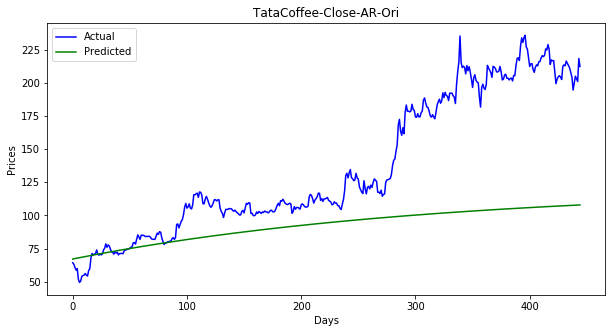

In [22]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [23]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 60.70700817654641
maPe-Testset: 0.2664871580854363


In [24]:
forecast=model_fit.predict(len(data1), len(data1)+200)

In [25]:
forecast

array([0.03659217, 0.0366182 , 0.03664415, 0.03667002, 0.03669581,
       0.03672152, 0.03674714, 0.03677269, 0.03679815, 0.03682353,
       0.03684883, 0.03687405, 0.0368992 , 0.03692426, 0.03694924,
       0.03697414, 0.03699897, 0.03702371, 0.03704838, 0.03707297,
       0.03709748, 0.03712191, 0.03714627, 0.03717054, 0.03719474,
       0.03721887, 0.03724292, 0.03726689, 0.03729078, 0.0373146 ,
       0.03733835, 0.03736202, 0.03738561, 0.03740913, 0.03743258,
       0.03745595, 0.03747924, 0.03750246, 0.03752561, 0.03754869,
       0.03757169, 0.03759462, 0.03761748, 0.03764026, 0.03766297,
       0.03768561, 0.03770818, 0.03773068, 0.0377531 , 0.03777546,
       0.03779774, 0.03781995, 0.03784209, 0.03786417, 0.03788617,
       0.0379081 , 0.03792996, 0.03795176, 0.03797348, 0.03799514,
       0.03801672, 0.03803824, 0.03805969, 0.03808107, 0.03810239,
       0.03812363, 0.03814481, 0.03816592, 0.03818697, 0.03820795,
       0.03822886, 0.03824971, 0.03827048, 0.0382912 , 0.03831

In [26]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [27]:
forecast_stock_price_test_oriF

,Closefore
0,107.903556
1,107.945181
2,107.986674
3,108.028035
4,108.069265
...,...
196,113.986645
197,114.008983
198,114.031249
199,114.053445


In [28]:
forecast_stock_price_test_oriF.to_csv("AR.csv",index=False)